# Framing the Problem and Data

In order to get a good idea about how we should get donors for DonorChoose.org re-engaged, we should get a better understanding of the data

In [4]:
library(data.table)
library(ggplot2)
library(scales)
library(repr)
library(dplyr)
options(repr.plot.width=10, repr.plot.height=3)
options(scipen=10000)
# options(plot.title = element_text(hjust = 0.5))

In [5]:

# Here is the full set of things you can change in element_text:

# element_text(family = NULL, face = NULL, colour = NULL, size = NULL,
#   hjust = NULL, vjust = NULL, angle = NULL, lineheight = NULL,
#   color = NULL)
    

In [6]:
Donations <- fread('data/Donations.csv')

In [7]:
Donors <- fread('data/Donors.csv')
Projects <- fread('data/Projects.csv')
Resources <- fread('data/Resources.csv')
Schools <- fread('data/Schools.csv')
Teachers <- fread('data/Teachers.csv')

In [81]:
Projects$`Project Cost` <- as.numeric(gsub('[$,]', '', Projects$`Project Cost`))

In [8]:
head(Donors)
head(Schools)

Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075
00004c31ce07c22148ee37acd0f814b9,,other,No,


School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50,Texas,75573,Redwater,Bowie,Redwater Ind Sch District
0004ffe3558fd70d939ad522b92447c8,Math & Science Success Academy,unknown,63,Arizona,85706,Tucson,Pima,Arizona Dept Of Education


## Donations

Perhaps the most important information is the 'Donations' information. After all, this is how the money is made! Let's take a look.

In [9]:
head(Donations)

Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38
000009891526c0ade7180f8423792063,8cea27f0cc03f41f66aab96b284ae6a1,896c75c9b8d9a91c759746e566cd3f37,Yes,15.00,1,2016-06-04 17:58:55


In [10]:
# By_Cart_Sequence = Donations[,.(.N,`Optional Donation` = sum(`Donation Included Optional Donation`=='Yes')),keyby = `Donor Cart Sequence`]

# ggplot(By_Cart_Sequence[1:15], aes(x=`Donor Cart Sequence`, y =N))+
#     geom_bar(stat = 'identity', aes(fill = `Donation Included Optional Donation`))


In [11]:
# Visualizing Donations over time
Donations[, `Donation Received Date` := anytime::anydate(`Donation Received Date`)]
Donations[, Year := format(`Donation Received Date`, '%Y')]
Donation_by_day <- Donations[,.(Total_Donations = sum(`Donation Amount`)), by = `Donation Received Date`]
Donation_by_day[, Year := format(`Donation Received Date`, '%Y')]

In [12]:
Donations[,.(`Donation Amount` = sum( `Donation Amount`)), by =Year]

Year,Donation Amount
2016,62652231.24
2013,30428220.80
2017,72872130.78
2018,26481196.48
2014,41461266.85
2015,50488354.49
2012,24842.64


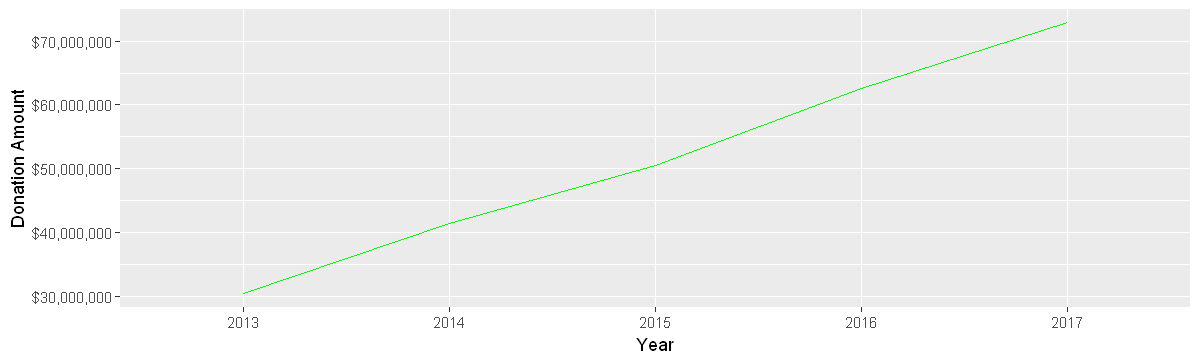

In [13]:
ggplot(Donations[Year!=2018 & Year!=2012,.(`Donation Amount` = sum( `Donation Amount`)), by =Year], aes(Year, `Donation Amount`)) +
    geom_line(aes(group = 1), color = 'green') +
    scale_y_continuous(labels=dollar_format())

In [14]:
print(paste0('Ratio of unique projects per donation: ' ,round(length(unique(Donations$`Project ID`)) / nrow(Donations),4)))
# length(unique(Donations$`Donation ID`)) / nrow(Donations)
print(paste0('Ratio of unique donors per donation: ', round(length(unique(Donations$`Donor ID`)) / nrow(Donations),4)))

[1] "Ratio of unique projects per donation: 0.1924"
[1] "Ratio of unique donors per donation: 0.4319"


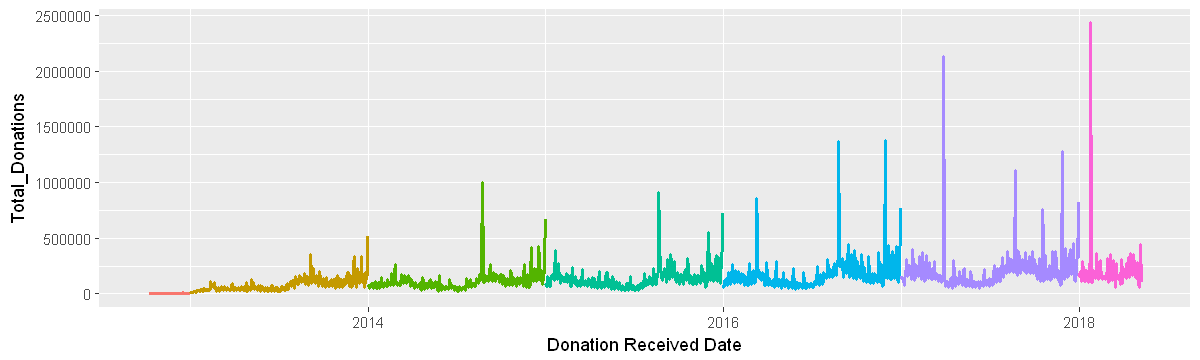

In [15]:
ggplot(Donation_by_day, aes(`Donation Received Date`, Total_Donations)) +
  geom_line(size = 1, aes(color = Year)) +
  theme(legend.position="none")

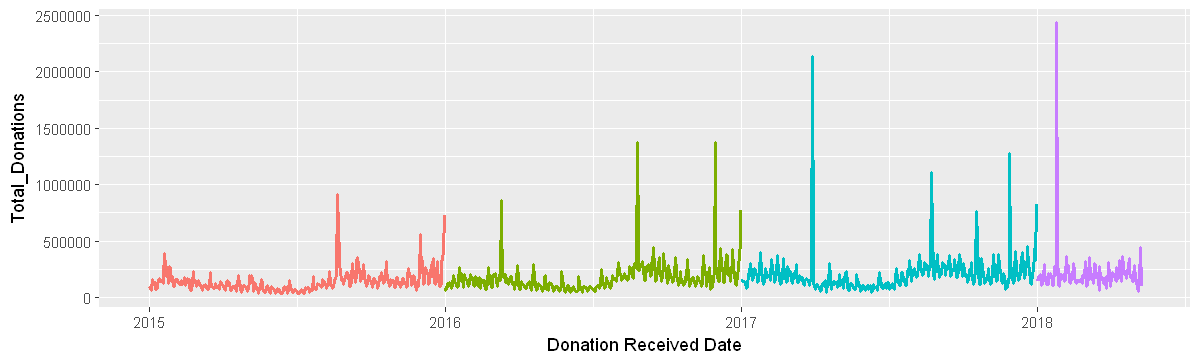

In [16]:
ggplot(Donation_by_day[`Year` >= 2015], aes(`Donation Received Date`, Total_Donations)) +
  geom_line(size = 1, aes(color = Year)) +
  theme(legend.position="none")

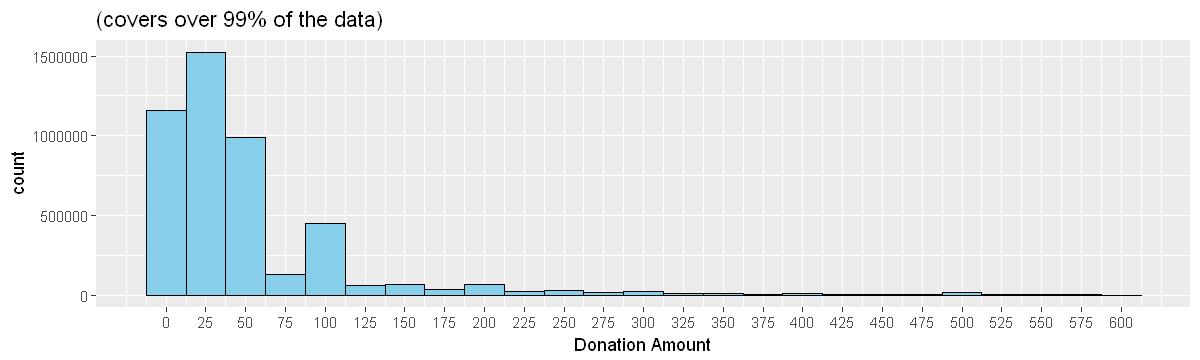

In [17]:
# nrow(Donations[`Donation Amount` < 600]) / nrow(Donations)

ggplot(Donations[`Donation Amount` < 600], aes(`Donation Amount`)) +
  geom_histogram(binwidth = 25, fill = 'skyblue', color = 'black') +
  scale_x_continuous(breaks = seq(0, 600, by = 25)) +
  labs(title = '(covers over 99% of the data)')

Now that we have an idea of the distribution of donations over time and amount, let's take a look the repeat donations

In [18]:
Repeated_Donors <- Donations[,.(`Times Donated`=.N, `Dollar Amount` = sum(`Donation Amount`)),by=`Donor ID`]

In [19]:
head(Repeated_Donors[order(-`Dollar Amount`)], 10)

Donor ID,Times Donated,Dollar Amount
a0e1d358aa17745ff3d3f4e4909356f3,10515,1879625.0
2144d56b1947ebb26a19e7f1d07c970a,2152,1243529.7
96c4f21513cd8962acb147ab384e6434,2148,1130565.6
3ba8a29e3dd72043f9738c0895733834,1553,977614.5
f9dd79ea006fee7bb4a5cc8473d8656c,1891,897408.3
d006be7223c048ae8b2bdedd7dd2b4db,3330,766000.7
bd58ba0b74427b6686b3d721f0cbcb6e,1126,695461.9
5f521d214a6297fe87b60f921bba51ab,669,569512.5
f4e59466422bf084792071a849284771,1580,463820.9
7f90cc03b021484df72d3fa18e42a151,327,336489.3


In [20]:
Repeated_Donors  <- Repeated_Donors[,.(`Number of People` = .N, `Dollar Worth` = sum(`Dollar Amount`)),  by = `Times Donated`]
Repeated_Donors[,`Dollar Per Individual` := `Dollar Worth`/`Number of People`]

In [21]:
head(Repeated_Donors[order(`Times Donated`)])

Times Donated,Number of People,Dollar Worth,Dollar Per Individual
1,1471613,78595864,53.40797
2,274902,33947995,123.49126
3,99063,19574818,197.59969
4,49911,13510249,270.68681
5,30578,10300913,336.87333
6,19665,8077697,410.76518


In [22]:
(123.49126- 53.40797) * 1471613
.2*53.40797*1471613

[1] 103135481

[1] 15719173

By using 'Dollar Per Individual' averages as an extremely rough benchmark, moving the 'Times Donated = 1' group into the 'Times Donated = 2' would net an additional 103 million dollars. Of course, this is not a scientific estimate given the unknown variations between those in the 'Times Donated = 1' group and the 'Times Donated = 2' group, but it goes to show how important re-engagement is.

If we get at least 20% of those who donated only once to make another donation with the same average donation, then we can get another 15 million dollars in revenue. 

In [23]:
print(paste0('The ratio of those who only donated once: ',Repeated_Donors[`Times Donated` == 1,`Number of People`]/Repeated_Donors[,sum(`Number of People`)]))
print(paste0('The dollar ratio of those who only donated once: ',Repeated_Donors[`Times Donated` == 1,`Dollar Worth`]/Repeated_Donors[,sum(`Dollar Worth`)]))
print('This means those who donated more than once (approx 28%) are responsible for around 73% of total revenue')

[1] "The ratio of those who only donated once: 0.726882562776789"
[1] "The dollar ratio of those who only donated once: 0.276348754183691"
[1] "This means those who donated more than once (approx 28%) are responsible for around 73% of total revenue"


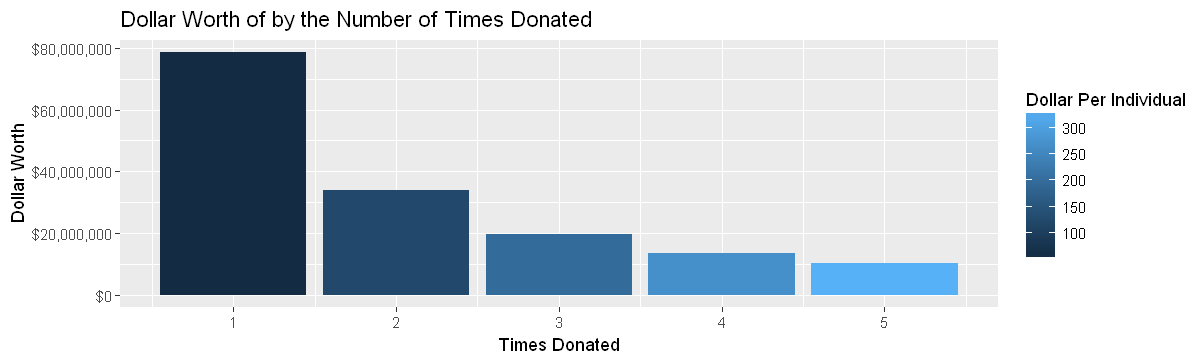

In [24]:
ggplot(Repeated_Donors[`Times Donated` <= 5], aes(x=`Times Donated`, y = `Dollar Worth`)) +
    geom_bar(stat = 'identity', aes(fill = `Dollar Per Individual`)) +
    scale_y_continuous(labels=dollar_format(prefix="$")) +
    scale_x_continuous(breaks = seq(0, 5, by = 1)) +
    labs(title = 'Dollar Worth of by the Number of Times Donated')

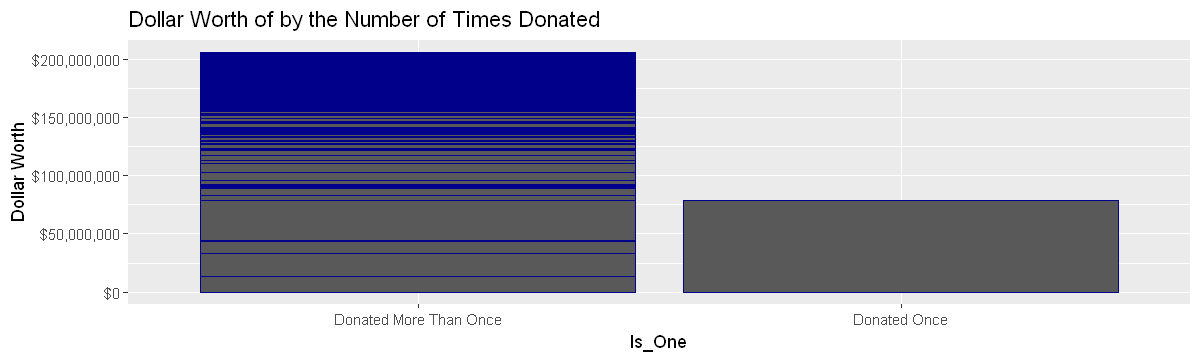

In [25]:
Repeated_Donors[,Is_One := ifelse(`Times Donated`== 1,'Donated Once','Donated More Than Once')]

ggplot(Repeated_Donors, aes(x=`Is_One`, y = `Dollar Worth`)) +
    geom_bar(stat = 'identity', color = 'darkblue') +
    scale_y_continuous(labels=dollar_format(prefix="$")) +
    labs(title = 'Dollar Worth of by the Number of Times Donated')

## Teachers
This dataframe does not contain a large amount of infomormation, but gender and first posted date may come in handy later.

In [26]:
head(Teachers)

Teacher ID,Teacher Prefix,Teacher First Project Posted Date
00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10
0000fc11407901bcacdfad1db909b9f6,Mrs.,2015-06-22


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

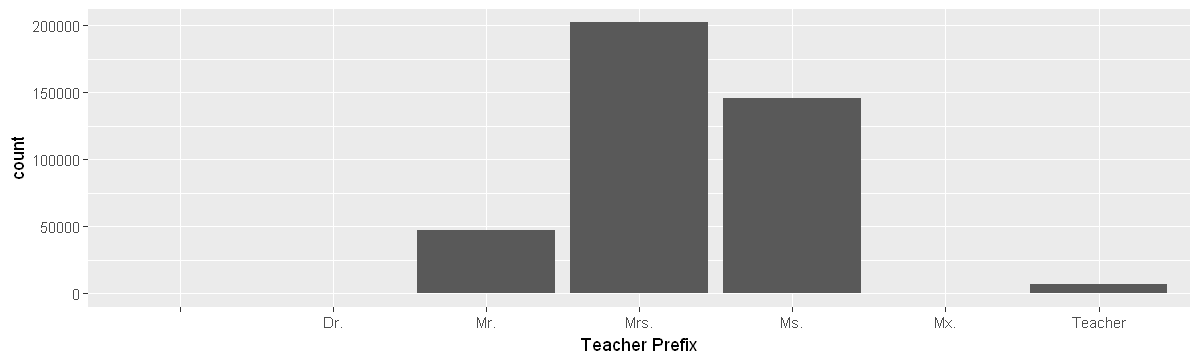

In [27]:
ggplot(Teachers,aes(`Teacher Prefix`))+
    geom_histogram(stat='count')

In [28]:
Males = Teachers[,sum(`Teacher Prefix`=='Mr.')]
Females = Teachers[,sum(`Teacher Prefix`=='Mrs.')]

If we consider all Mrs./Ms. to be female and all Mr. to be male, we can find out the gender distribution.

In [29]:
Males
Females
Females/Males

[1] 47480

[1] 202142

[1] 4.257414

By looking at the numbers above, we can see that for every male teacher, there is about four female teachers.

## Projects

This dataset is interesting, we can learn the differences inbetween projects that succeeded and projects that failed quite easily. Not only this, but linking this back to school or teacher may bring out interesting differences inbtween projects that pass or fail.

In [30]:
head(subset(Projects, select = -`Project Essay`),3)

Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Current Status,Project Fully Funded Date
77b7d3f2ac4e32d538914e4a8cb8a525,c2d5cb0a29a62e72cdccee939f434181,59f7d2c62f7e76a99d31db6f62b7b67c,2,Teacher-Led,Anti-Bullying Begins with Me,"Applied Learning, Literacy & Language","Character Education, Literacy",Grades PreK-2,Books,$490.38,2013-01-01,Fully Funded,2013-03-12
fd928b7f6386366a9cad2bea40df4b25,8acbb544c9215b25c71a0c655200baea,8fbd92394e20d647ddcdc6085ce1604b,1,Teacher-Led,Ukuleles For Middle Schoolers,Music & The Arts,Music,Grades 6-8,Supplies,$420.61,2013-01-01,Expired,
7c915e8e1d27f10a94abd689e99c336f,0ae85ea7c7acc41cffa9f81dc61d46df,9140ac16d2e6cee45bd50b0b2ce8cd04,2,Teacher-Led,"Big Books, Flip Books, And Everything In Between","Literacy & Language, Special Needs","Literacy, Special Needs",Grades PreK-2,Books,$510.46,2013-01-01,Fully Funded,2013-01-07


In [31]:
write.csv(head(Projects[,`Project Essay`],1000),'Words Small.csv')

In [32]:
# test  <- Projects

# test[,`Project Cost`:=as.numeric(`Project Cost`)]

In [33]:
# as.numeric(gsub("\\$", "", Projects$`Project Cost`))

In [35]:
# Categories  <- Projects[,.(Count = .N,mean(`Project Cost`)),by=.(`Project Resource Category`)]
# Categories[order(-Count)]

In [36]:
Projects[,.N,by=.(`Project Current Status`)]

Project Current Status,N
Fully Funded,821367
Expired,241329
Archived,98003
Live,47952


In [37]:
Projects[,.N,by=.(`Project Current Status`)][1,2]/Projects[,.N,by=.(`Project Current Status`)][2,2]

N
3.403516


In [38]:
# ggplot(Projects[,.N,by=.(`Project Current Status`)],aes(`Project Current Status`, N)) +
#     geom_bar(stat = 'identity')

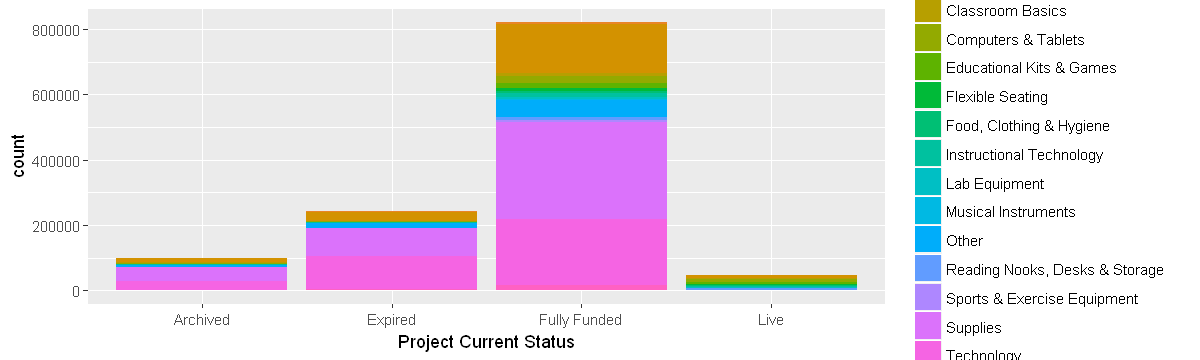

In [39]:
ggplot(Projects,aes(`Project Current Status`))+
    geom_bar(aes(fill = `Project Resource Category`))

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

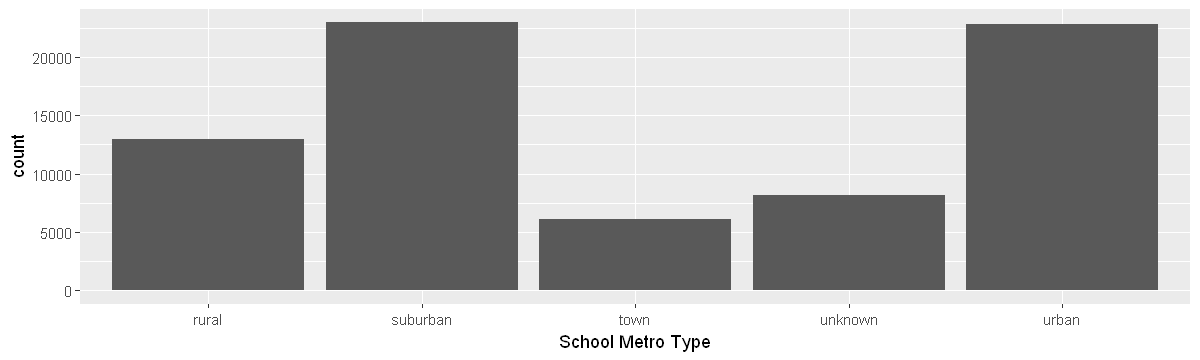

In [40]:
ggplot(Schools,aes(`School Metro Type`))+
    geom_histogram(stat="count")

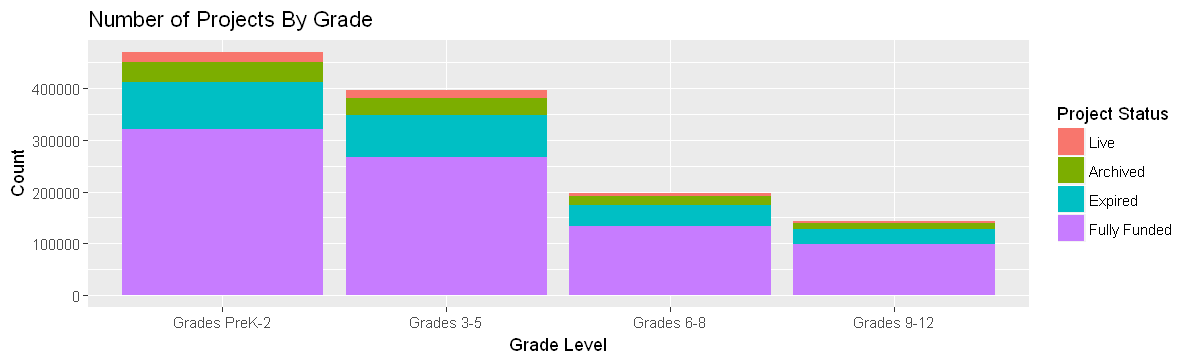

In [41]:
by_grade  <- Projects[`Project Grade Level Category` != 'unknown',.N,by=.(`Project Grade Level Category`,`Project Current Status`)]

# Observing the number of projects by grade. It appears as though those in lower grades have many more projects decicated. 
# However, the ratio of funded projects appears so be similar throughout, so little grade bias by donor.

ggplot(by_grade, aes(reorder(`Project Grade Level Category`,desc(N)), N)) +
    geom_bar(stat= 'identity', aes(fill = reorder(`Project Current Status`, N))) +
    labs(title = 'Number of Projects By Grade', x='Grade Level', y='Count' ) +
    guides(fill=guide_legend(title="Project Status"))

In [42]:
ele = nrow(Projects[`Project Grade Level Category` == 'Grades PreK-2' | `Project Grade Level Category` == 'Grades 3-5'])
middle = nrow(Projects[`Project Grade Level Category` == 'Grades 6-8'])
high = nrow(Projects[`Project Grade Level Category` == 'Grades 9-12'])
all = nrow(Projects[`Project Grade Level Category` != 'unknown'])

ele = round(ele/all,4)*100
middle = round(middle/all,4)*100
high = round(high/all,4)*100

print('If we filter the rows where the grade level is not known:')
print(paste0(ele,'% of projects are for elementary schoolers'))
print(paste0(middle,'% of projects are for middle schoolers'))
print(paste0(high,'% of projects are for high schoolers'))

In [43]:
print('If we filter the rows where the grade level is not known:')
print(paste0(ele,'% of projects are for elementary schoolers'))
print(paste0(middle,'% of projects are for middle schoolers'))
print(paste0(high,'% of projects are for high schoolers'))

[1] "If we filter the rows where the grade level is not known:"
[1] "71.79% of projects are for elementary schoolers"
[1] "16.38% of projects are for middle schoolers"
[1] "11.83% of projects are for high schoolers"


## Do people donate across state lines? (State loyality)

In order to build a recommendation system, it is important to see if we should try to engage users across state lines. To do this, we must observe if people donate from states that they are not from. Also, it would be helpful to see if people typically donate to more than one state or more to .

In [44]:
# The %>% operator from package 'dplyr' is used as opposed completely using the 'data.table' package to aid in interpretability
library(dplyr)


# Linking up the datasets.
Donations_Linked <- merge(Donations,Projects) %>%
  merge(Donors, by = 'Donor ID') %>%
  merge(Schools, by = 'School ID') %>%
  merge(Teachers, by = 'Teacher ID')

In [1]:
states = Donations_Linked[,.(`Donor ID`,`School State`,`School City`,`Donor State`,`Donor City`)]
states[,`Same State` := ifelse(`School State` == `Donor State`, TRUE,FALSE)]
states[,`Same City` := ifelse(`School City` == `Donor City`, TRUE,FALSE)]

# head(states,3)

state_ratio = nrow(states[`Same State`==TRUE])/nrow(states)
city_ratio = nrow(states[`Same City`==TRUE])/nrow(states)


print(paste0('The ratio of donations coming from the same state: ', round(state_ratio,4)*100,'%'))
print(paste0('The ratio of donations coming from the same city: ', round(city_ratio,4)*100,'%'))

ERROR: Error in eval(expr, envir, enclos): object 'Donations_Linked' not found


While most of the donations come from similar states, a significant poplulation (approx. 34.78%) come from different states. This indicates that while the project state does have some influence on wheter a person will donate, it is not absolute. Also, around 26% of donations occur in the same city where the donor lives. Therefore, we should consider the location as a factor in the receommendation system.

## Do repeat donors only give to one school, teacher, or state? (Donor loyalty)

When trying to re-engage potential donors, it is important to know what projects they will be likely to donate to. Maybe a donor is only willng to donate to a single school, teacher, or state. 

In [46]:
# Performance Intensive

Repeated <- Donations_Linked[,.(
    `Times Donated`=.N, 
    `Different Schools` = length(unique(`School ID`)),
    `Different Teachers` =  length(unique(`Teacher ID`)),
    `Different States` = length(unique(`School State`))
    ),by=`Donor ID`]

In [47]:
Repeated_Donors <- Repeated[`Times Donated`  > 1]

In [48]:
Repeated_Donors[, `:=`(
    `Only Donated to One School` = ifelse(`Different Schools` == 1,1,0),
    `Only Donated to One Teacher` = ifelse(`Different Teachers` == 1,1,0),
    `Only Donated to One State` = ifelse(`Different States` == 1,1,0)
)]

In [49]:
Repeated_Donors_Grouped  <- Repeated_Donors[,.(
    `Donors` = .N, 
    `Different Schools` = sum(`Different Schools`),
    `Percentage of Gave only to One School`= mean(`Only Donated to One School`),
    `Percentage of Gave only to One Teacher`= mean(`Only Donated to One Teacher`),
    `Percentage of Gave only to One State`=mean(`Only Donated to One State`)
), keyby = `Times Donated`]



In [50]:
# Only_One_School  <- Repeated_Donors[,.(`Donors` = .N , `Different Schools` = sum(`Different Schools`),`Percentage of Gave only to One School`= mean(`Only Donated to One School`)), keyby = `Times Donated`]
head(Repeated_Donors_Grouped,10)

Times Donated,Donors,Different Schools,Percentage of Gave only to One School,Percentage of Gave only to One Teacher,Percentage of Gave only to One State
2,274695,393277,0.5683139,0.4674494,0.8304556
3,99032,179565,0.4610227,0.3540068,0.7690242
4,49896,106783,0.4269481,0.3260782,0.7361712
5,30570,75229,0.4074910,0.3115146,0.7158325
6,19660,54997,0.3856562,0.2934385,0.6856562
7,14085,43774,0.3696131,0.2854810,0.6675186
8,10352,35640,0.3567427,0.2736669,0.6506955
9,7881,30236,0.3486867,0.2602462,0.6335490
10,6204,26418,0.3310767,0.2498388,0.6200838
11,5007,23068,0.3119633,0.2370681,0.5905732


In [51]:
Repeated_Donors_Grouped[`Times Donated` <= 8,sum(Donors),]/Repeated_Donors_Grouped[,sum(Donors)]

[1] 0.9016

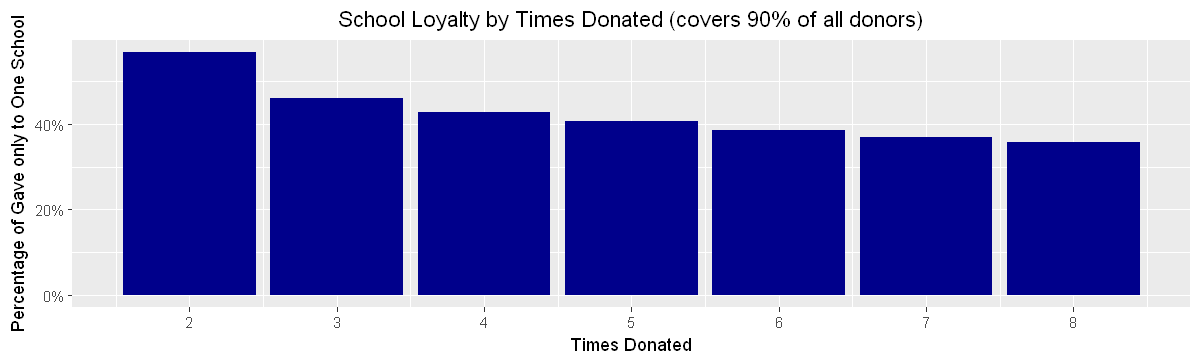

In [52]:
ggplot(Repeated_Donors_Grouped[`Times Donated` <= 8], aes(x=`Times Donated`, y = `Percentage of Gave only to One School`)) +
    geom_bar(stat = 'identity', fill = 'darkblue') +
    labs(title = 'School Loyalty by Times Donated (covers 90% of all donors)') +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_y_continuous(labels = scales::percent) +
    scale_x_continuous(breaks = seq(2, 8, by = 1))

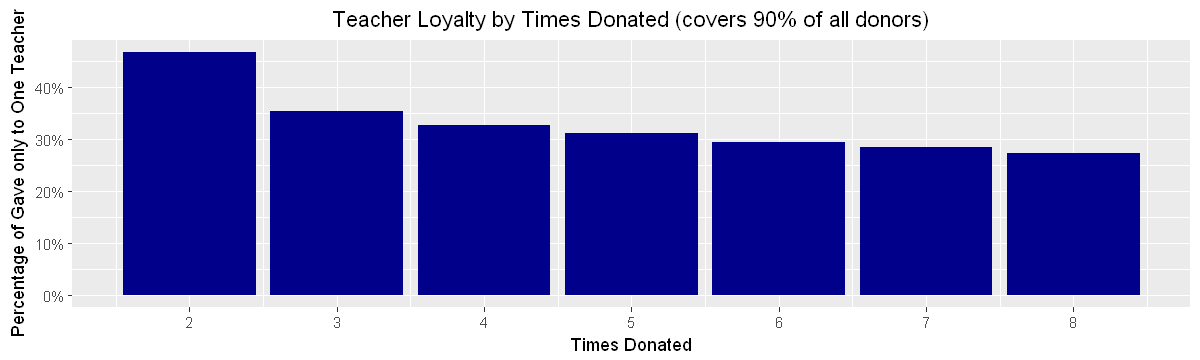

In [53]:
ggplot(Repeated_Donors_Grouped[`Times Donated` <= 8], aes(x=`Times Donated`, y = `Percentage of Gave only to One Teacher`)) +
    geom_bar(stat = 'identity', fill = 'darkblue') +
    labs(title = 'Teacher Loyalty by Times Donated (covers 90% of all donors)') +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_y_continuous(labels = scales::percent) +
    scale_x_continuous(breaks = seq(2, 8, by = 1))

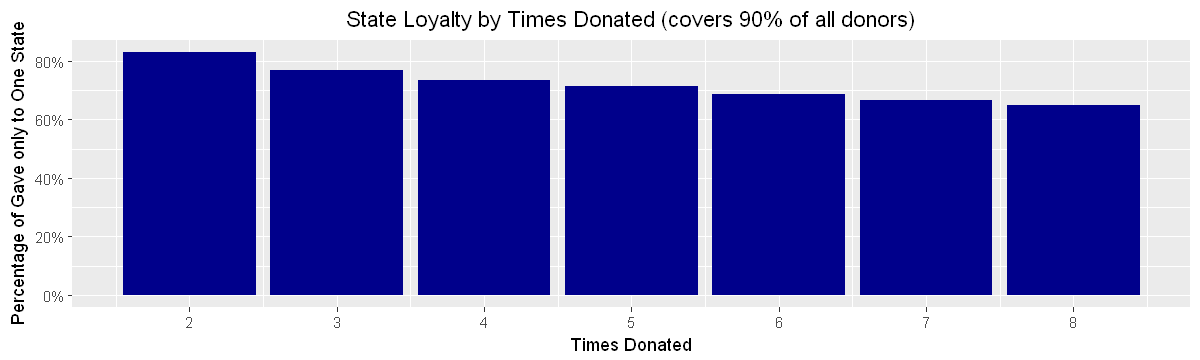

In [54]:
ggplot(Repeated_Donors_Grouped[`Times Donated` <= 8], aes(x=`Times Donated`, y = `Percentage of Gave only to One State`)) +
    geom_bar(stat = 'identity', fill = 'darkblue') +
    labs(title = 'State Loyalty by Times Donated (covers 90% of all donors)') +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_y_continuous(labels = scales::percent) +
    scale_x_continuous(breaks = seq(2, 8, by = 1))

Here we can see a preference of donors only giving to a single school. Reasons for this could be: a donor might have a child in this school, a donor may know the teacher, or a donor may have attended the school previously. It would be wise to add a variable to our recommender algorythm to see if a person only gave to a single school, especially if they have donated many times. It appears around a third of donors only donate to a single school no matter how many times they donate, our recommendation system should try to account for these donors.

## How many projects does a teacher do?

In [55]:
Repeated_Teachers  <- Projects[,.(`Number of Projects`=.N),by=`Teacher ID`]
Repeated_Teachers_Grouped  <- Repeated_Teachers[,.N,keyby='Number of Projects']
head(Repeated_Teachers_Grouped,10)

Number of Projects,N
1,211430
2,76657
3,37906
4,21646
5,13346
6,8955
7,6167
8,4581
9,3440
10,2680


Percentage of Teachers who do more than one project

In [56]:
1-Repeated_Teachers_Grouped[`Number of Projects` == 1,sum(N)]/Repeated_Teachers_Grouped[,sum(N)]

[1] 0.4752296

## How many people typically donate to a project?

In [122]:
By_Project <- Donations_Linked[,.(Donors = length(`Donor ID`), Status =),by = `Project ID`]
By_Project_Grouped <- By_Project[,.N,keyby = .(`Donors`,`Project Current Status`)]

ERROR: Error in eval(bysub, x, parent.frame()): object 'Project Current Status' not found


In [123]:
head(By_Project

Project ID,Donors
c53185d991ad3e2a73918d0d9021d3cf,9
40959660680ef3124d74ce3385248f88,4
3bd76a05f29ae5e3840c3c0eb05ff59f,2
2f53e5f31890e647048ac217cda3b83f,3
75131d2e94930082aa8ed1e4cd4d21da,1
e09933470f4256cc2643341c1d299e55,7
e2beb818569f66adaa4ced21ca299ac6,7
c5821d32012efd7df4f6fa12e230e991,4
7143ffacf315cb3ed5a9dcd2d39f6398,3
7771a382bf28d33e0046d74f495afda7,12


In [107]:
head(By_Project_Grouped)

Donors,N
1,217371
2,142821
3,109878
4,86996
5,69070
6,54497


In [71]:
head(By_Project[order(desc(Donors))],10)

Project ID,Donors
c34218abf3fecd36be01305d67ed7fbb,863
d6a260b9099aabdac7f5cb620c7481e6,663
a720b2e32df79c52f8926bb00060b3f6,631
a7028bc2602104e658ef72db1b9ca520,600
ea99d0493c7c668890eca8f7a8b38fb9,538
132141bfb266d8deedf085ba37f6e2fa,536
31c9862995b9f65b0e92d03a91120df8,499
2450ee51be5cb2443ef5285ead5272f6,476
c5582cb6dc5d45a7f4d9a9a41c71713b,474
bd89d8f499ff23ce7a421b1c4703d43a,472


In [74]:
Projects %>%
    select(-`Project Essay`) %>%
    filter(`Project ID` == 'c34218abf3fecd36be01305d67ed7fbb')

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Current Status,Project Fully Funded Date
c34218abf3fecd36be01305d67ed7fbb,e5d780f83322945f54d4ffb02765371b,7fe6dd0c1af5f911e9bc38030cfb4ced,1,Teacher-Led,Vallecito StandUpKids Pilot Standing School!,"Health & Sports, Literacy & Language","Health & Wellness, Literacy",Grades 3-5,Supplies,"$110,075.19",2015-05-26,Fully Funded,2015-08-12


In [76]:
Projects %>%
    select(`Project ID`,`Project Essay`) %>%
    filter(`Project ID` == 'c34218abf3fecd36be01305d67ed7fbb')

Project ID,Project Essay
c34218abf3fecd36be01305d67ed7fbb,"in order for children to learn, they need to move. our school is a safe and wonderful place for children but they are confined to desks that don't fit their wildly varying body sizes and don't allow them to move. we want to create a 21st century learning environment for our kids. <!--donotremoveessaydivider-->the students at our elementary are active and eager to learn. they are a diverse group with different learning styles and needs but they all share the same drive to move in order to learn. our school already has 100 standing desks in fourth and first grades and the students, teachers, and parents alike can't even imagine going back to industrial-feeling sitting desks. students say they feel more focused and happier and love that they can move continuously throughout the day. our community wants to create an all-standing school as a showcase to all schools to show that sitting too much is a public health crisis and that standing desks are a simple and elegant solution. research shows that kids burn between 15 - 30% more calories and are significantly more focused and engaged at a standing desk. <!--donotremoveessaydivider-->our students will use the standing desks all day for lessons and group work. because the desks are outfitted with casters, they create a simple and easy way to reconfigure the classroom set up or simply move the desks aside to create a wide open space for reading, moving, performances, and group activities. the desks will increase engagement and create and environment where kids can be continuously moving in a non-disruptive way. these desks will create a movement-rich environment for our children. <!--donotremoveessaydivider-->our kids are spending nearly 85% of their waking hours in sedentary positions. standing desks are a simple and elegant way to create a movement rich environment where children are more engaged and perform better academically, burn more calories, eliminate or minimize orthopedic problems and disease, feel happier, and just plain move more."


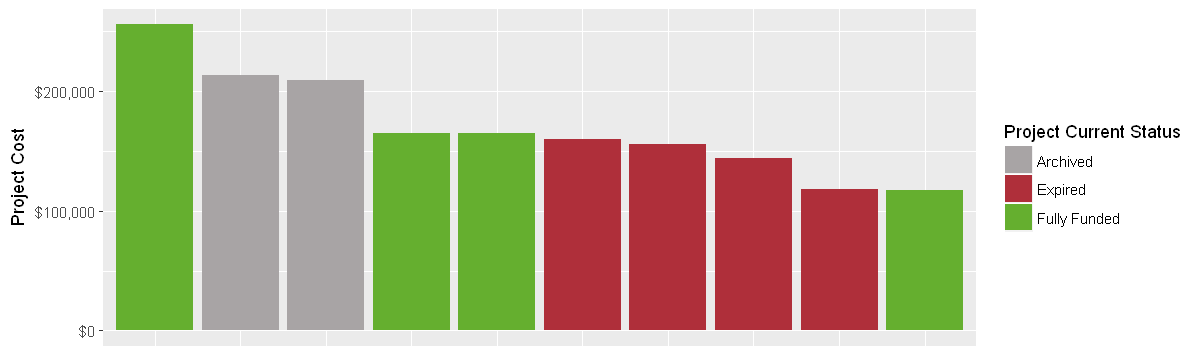

In [106]:
Projects %>%
    select(-`Project Essay`) %>%
    top_n(10,`Project Cost`) %>%
    ggplot(aes(reorder(`Project ID`,desc(`Project Cost`)),`Project Cost`)) +
    geom_bar(stat= 'identity', aes(fill = `Project Current Status`)) +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
    scale_fill_manual(values=c("#a8a4a5",  "#af2f3a", "#65af2f")) +
    scale_y_continuous(labels=dollar_format(prefix="$"))

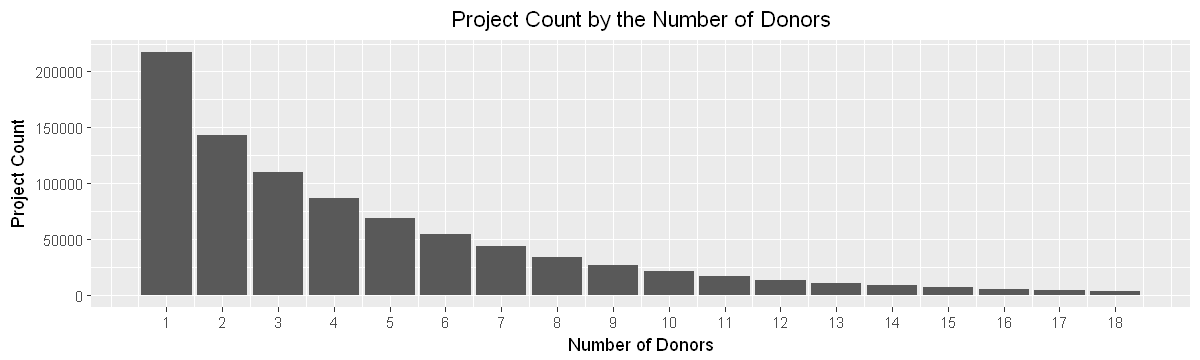

In [120]:
ggplot(By_Project_Grouped[N > 3000], aes(Donors,N))+
    geom_bar(stat = 'identity')+
    scale_x_continuous(breaks = seq(1, 18, by = 1)) +
    labs(title = 'Project Count by the Number of Donors', y = 'Project Count', x = 'Number of Donors') +
    theme(plot.title = element_text(hjust = 0.5))